In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import json_normalize
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#conversations.json
file_path_conversations = 'conversations.json'

In [7]:
df_conversations = pd.read_json(file_path_conversations)

In [22]:
df= df_conversations

In [8]:
df_conversations.head()

,title,create_time,update_time,mapping,moderation_results,current_node,plugin_ids,conversation_id,conversation_template_id,gizmo_id,is_archived,safe_urls,id
0,New chat,2024-02-23 20:22:30.557660160,2024-02-23 20:26:15.059442944,{'901fce65-48e2-45f2-9d07-83ad09274819': {'id'...,[],3bfb4acf-5b4d-473e-9363-987a36f27ea9,None,88e63e17-1998-4b40-b414-c1079a1b63bd,None,None,False,[],88e63e17-1998-4b40-b414-c1079a1b63bd
1,Page Protection with Supabase,2024-02-23 20:13:04.292666880,2024-02-24 02:01:56.557310976,{'ce553b37-410e-4190-8d4d-165c97066364': {'id'...,[],6bea20b9-ca18-4ba2-9e04-9d7c7b739a35,None,cafdd5fe-dc40-447b-a40c-e4214ba998c4,g-Uuf99ko6o,g-Uuf99ko6o,False,[https://www.restack.io/docs/supabase-knowledg...,cafdd5fe-dc40-447b-a40c-e4214ba998c4
2,New chat,2024-02-23 12:27:42.492659200,2024-02-23 12:47:36.898371840,{'3b5444b5-9cfa-4b11-879b-54088cf0f1c0': {'id'...,[],7738b8b7-3786-40c5-b423-108577bcdbe2,None,99ec41c1-8caa-4d3f-8666-f38c64645931,None,None,False,[],99ec41c1-8caa-4d3f-8666-f38c64645931
3,Simplified Odometer Tracking,2024-02-23 07:14:06.639510016,2024-02-23 07:42:46.179835136,{'d12db902-8240-4d80-a1d6-d034a11232eb': {'id'...,[],96bae171-309d-408f-a781-435b54e4cadb,None,c21adc33-2f70-4206-b056-91b2d92bdb21,g-Uuf99ko6o,g-Uuf99ko6o,False,"[e.target, https://kpfnengbdncmfutbujls.supaba...",c21adc33-2f70-4206-b056-91b2d92bdb21
4,Python Skills for Data.,2024-02-23 04:28:04.267864832,2024-02-23 04:30:45.310503936,{'00a4731a-a3f9-44f1-9122-1cf0b715b3d8': {'id'...,[],fbfa7510-be14-4513-930c-0a303a77397b,None,c2e1c949-a11f-4c83-a70f-f4eb7ba5e6a6,None,None,False,[],c2e1c949-a11f-4c83-a70f-f4eb7ba5e6a6


In [23]:
df.columns

Index(['title', 'create_time', 'update_time', 'mapping', 'moderation_results',
       'current_node', 'plugin_ids', 'conversation_id',
       'conversation_template_id', 'gizmo_id', 'is_archived', 'safe_urls',
       'id', 'cleaned_title'],
      dtype='object')

In [9]:
file_path_message_feedback = 'message_feedback.json'

In [10]:
df_messsage_feedback = pd.read_json(file_path_message_feedback)

In [11]:
df_messsage_feedback.head()

,id,conversation_id,user_id,rating,create_time,workspace_id,content,storage_protocol,message_id
0,caa56275-8408-4f10-89a3-b77543b1c575,b38ebf03-e96b-4b4b-affd-10a16689520e,user-CYHAZJqP6oNhEYj53mH8uekE,thumbsUp,2023-11-01 11:03:46.460227+00:00,NaN,{},zstd::1.5.5.1,NaN
1,a3c66c6e-3498-47a8-9139-14b568ef6af5,18e69e96-79f0-458e-8509-476291077371,user-CYHAZJqP6oNhEYj53mH8uekE,thumbsUp,2023-11-10 15:36:40.674416+00:00,NaN,"{""text"": ""should provide links by default ""}",zstd::1.5.5.1,NaN
2,4e42c540-e43f-43f7-bea3-be23667a30f2,653898ed-6be3-49f9-85a4-858bd613c3f5,user-CYHAZJqP6oNhEYj53mH8uekE,thumbsUp,2023-11-12 14:17:21.650412+00:00,NaN,{},zstd::1.5.5.1,NaN
3,7e66440d-ce65-4f3b-9ed8-84730a49f073,2eaf1343-5226-47c0-bbbe-f50163ec80bb,user-CYHAZJqP6oNhEYj53mH8uekE,thumbsUp,2023-11-23 22:23:14.757841+00:00,NaN,"{""text"": ""just that it highlighted \""rookies\""...",zstd::1.5.5.1,NaN
4,d1893b4c-6264-432f-932c-c41026bbdb3c,761e986f-47be-4019-be9e-9da6d409aba3,user-CYHAZJqP6oNhEYj53mH8uekE,thumbsUp,2023-11-29 20:46:01.703761+00:00,NaN,{},zstd::1.5.5.1,NaN


In [12]:
file_path_user = 'user.json'

In [13]:
df_conversations.describe()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_16440\1298455493.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_conversations.describe()
C:\Users\Ryan\AppData\Local\Temp\ipykernel_16440\1298455493.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_conversations.describe()


,title,create_time,update_time,mapping,moderation_results,current_node,plugin_ids,conversation_id,conversation_template_id,gizmo_id,is_archived,safe_urls,id
count,2166,2166,2166,2166,2166,2166,277,2166,171,171,2166,2166,2166
unique,1906,2166,2157,2166,1,2166,45,2166,3,3,2,644,2166
top,New chat,2024-02-23 20:22:30.557660160,2023-01-24 11:29:39,{'901fce65-48e2-45f2-9d07-83ad09274819': {'id'...,[],3bfb4acf-5b4d-473e-9363-987a36f27ea9,"[plugin-9842d5f5-844b-45e3-8d5c-551f1c2539ee, ...",88e63e17-1998-4b40-b414-c1079a1b63bd,g-Uuf99ko6o,g-Uuf99ko6o,False,[],88e63e17-1998-4b40-b414-c1079a1b63bd
freq,237,1,10,1,2166,1,49,1,165,165,2164,1416,1
first,NaN,2023-01-11 04:41:47.831278080,2023-01-11 04:53:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2024-02-23 20:22:30.557660160,2024-02-24 02:01:56.557310976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_conversations.dtypes

title                               object
create_time                 datetime64[ns]
update_time                 datetime64[ns]
mapping                             object
moderation_results                  object
current_node                        object
plugin_ids                          object
conversation_id                     object
conversation_template_id            object
gizmo_id                            object
is_archived                           bool
safe_urls                           object
id                                  object
dtype: object

In [15]:
# Custom stopwords
custom_stopwords = ['new', 'chat']
stop_words = set(stopwords.words('english')).union(custom_stopwords)

In [16]:
# Example of cleaning text data in the 'title' column
df_conversations['cleaned_title'] = df_conversations['title'].str.lower().str.replace('[^\w\s]', '', regex=True)
df_conversations['cleaned_title'] = df_conversations['cleaned_title'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [17]:
# Split words and count
from collections import Counter
word_counts = Counter(" ".join(df_conversations['cleaned_title']).split())
most_common_words = word_counts.most_common(20)
print(most_common_words)

[('css', 107), ('code', 106), ('react', 94), ('javascript', 83), ('nextjs', 80), ('app', 72), ('image', 64), ('fix', 63), ('create', 56), ('data', 53), ('error', 52), ('html', 51), ('component', 45), ('web', 41), ('ai', 41), ('js', 39), ('setup', 38), ('add', 37), ('discord', 37), ('project', 34)]


In [18]:
# Word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(" ".join(df_conversations['cleaned_title']))

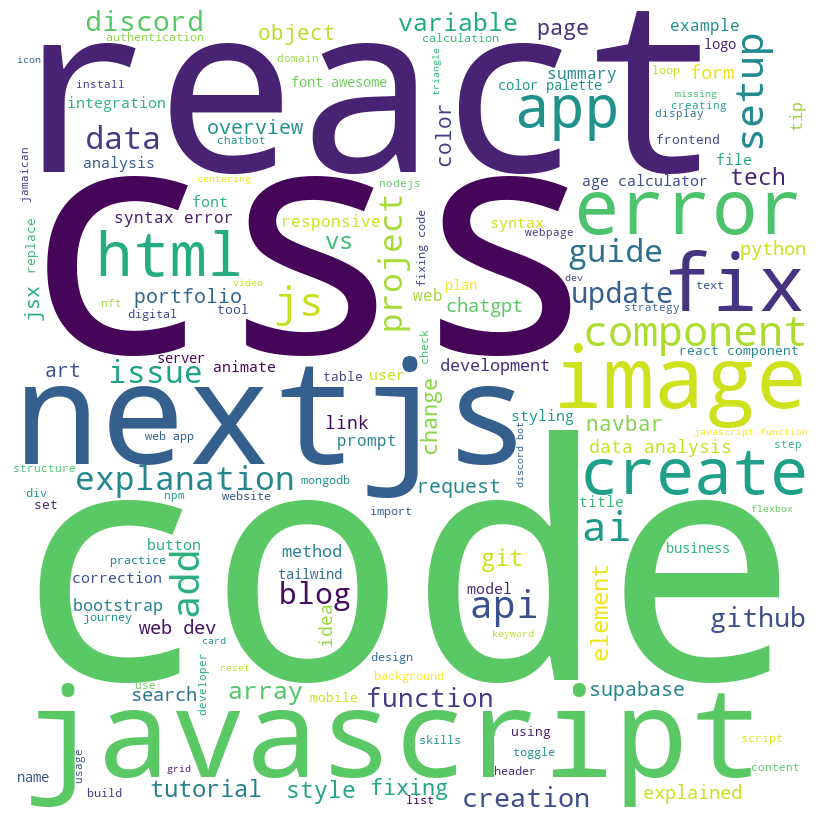

In [19]:
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()